In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import reuters # 데이터 셋 불러오기
# 수치화 -> vector
# 토픽 46가지 -> onehot_encoding

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
# 빈도수가 많은 데이터 10000개

/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
print(train_data.shape)
print(test_data.shape)
print(train_data[0])

(8982,)
(2246,)
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [4]:
# 데이터 vector로 변환하기

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [5]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
print(x_train[0])
print(x_test[0])

[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]


In [7]:
# labels onehotencoding하기
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

print(one_hot_train_labels[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
from keras import models
from keras import layers

# 모델 생성하기
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


In [9]:
# 모델 구성하기

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# 검증 데이터 만들기

x_val = x_train[:1000]
y_val = one_hot_train_labels[:1000]

x_train = x_train[1000:]
y_train = one_hot_train_labels[1000:]

In [11]:
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 16s 83ms/step - loss: 3.4252 - accuracy: 0.3154 - val_loss: 2.1872 - val_accuracy: 0.6290
Epoch 2/20
16/16 [==============================] - 1s 46ms/step - loss: 1.8654 - accuracy: 0.6869 - val_loss: 1.4698 - val_accuracy: 0.7070
Epoch 3/20
16/16 [==============================] - 1s 47ms/step - loss: 1.2391 - accuracy: 0.7562 - val_loss: 1.2557 - val_accuracy: 0.7400
Epoch 4/20
16/16 [==============================] - 1s 46ms/step - loss: 0.9785 - accuracy: 0.7981 - val_loss: 1.1353 - val_accuracy: 0.7490
Epoch 5/20
16/16 [==============================] - 1s 46ms/step - loss: 0.7843 - accuracy: 0.8368 - val_loss: 1.0391 - val_accuracy: 0.7830
Epoch 6/20
16/16 [==============================] - 1s 47ms/step - loss: 0.6542 - accuracy: 0.8621 - val_loss: 1.0027 - val_accuracy: 0.7870
Epoch 7/20
16/16 [==============================] - 1s 46ms/step - loss: 0.5292 - accuracy: 0.8897 - val_loss: 0.9536 - val_accuracy: 0.7990
Epoch 8/20
1

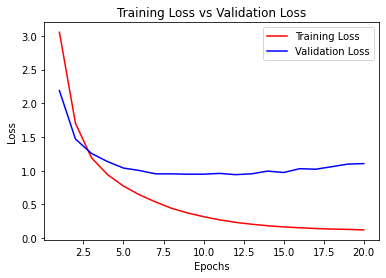

In [16]:
# 그래프 도식화

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()